## Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#for encoding
from sklearn.preprocessing import LabelEncoder
#for train test splitting
from sklearn.model_selection import train_test_split
#for decision tree object
from sklearn.tree import DecisionTreeClassifier
#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree
from sklearn.tree import plot_tree

## Reading the data

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Some basic data analytics

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.shape

(150, 5)

In [6]:
iris.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

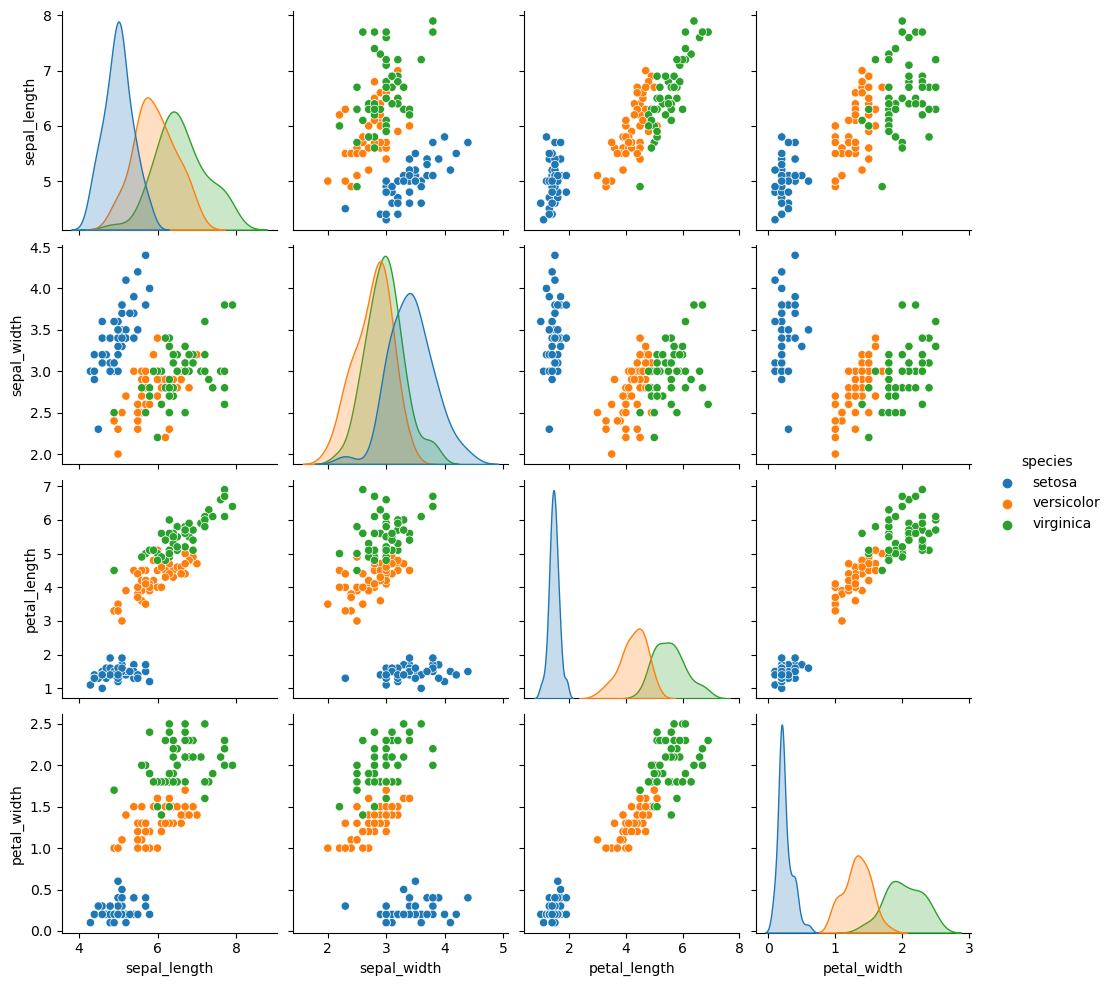

In [7]:
sns.pairplot(data=iris, hue='species')

C:\Users\Garima\AppData\Local\Temp\ipykernel_17888\3236839467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr())


<Axes: >

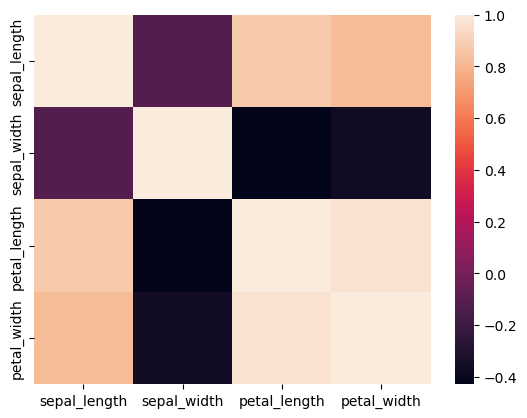

In [8]:
# correlation matrix
sns.heatmap(iris.corr())

In [9]:
# Separating target variable(y) and features(X) as follows
target = iris['species']
df1 = iris.copy()
df1 = df1.drop('species', axis=1)

In [12]:
# Defining the attributes
X = df1

In [13]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [15]:
# Label encoding as target variable is categorical
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
y = target

In [17]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 5)

In [19]:
# Defining the decision tree algorithm
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision Tree Classifier created")

Decision Tree Classifier created


In [21]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test, y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



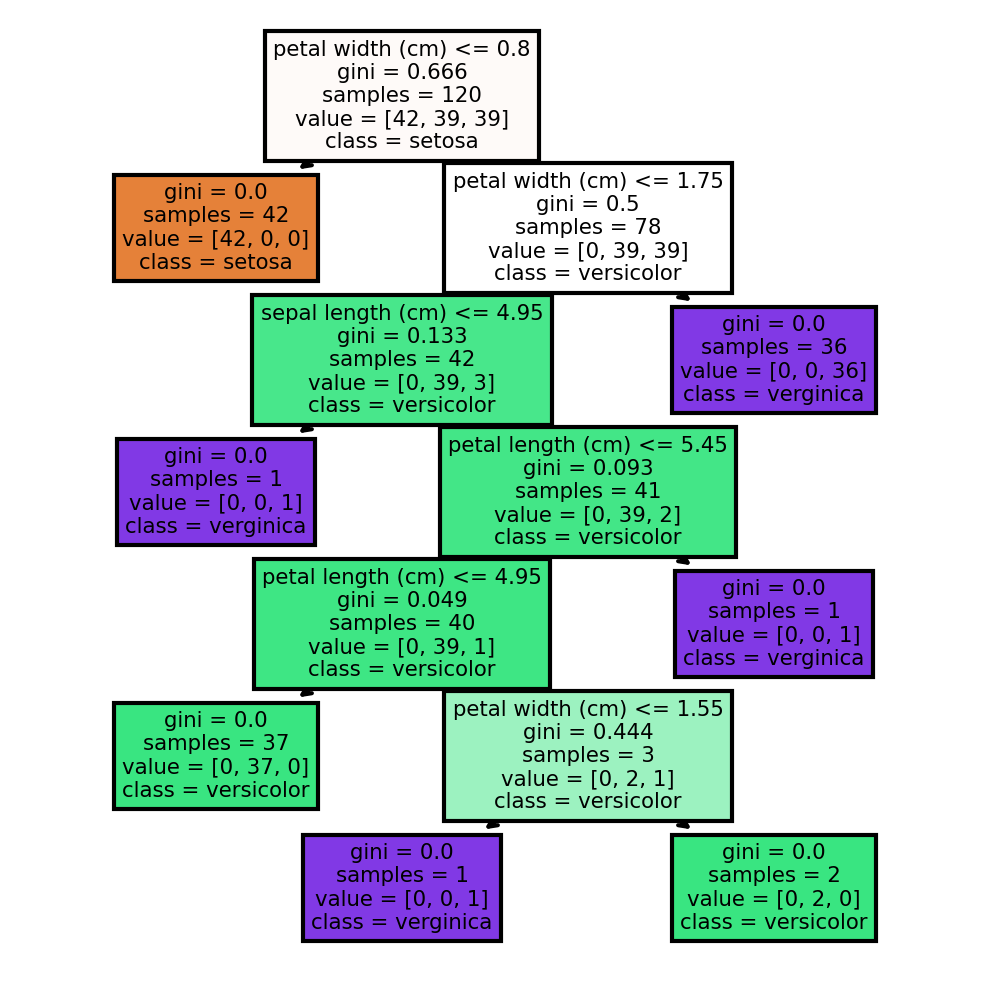

In [27]:
from sklearn import tree
fn =['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn =['setosa','versicolor','verginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(dtree, feature_names=fn, class_names=cn, filled=True);
fig.savefig('imagename.png')